In [6]:
from sqlalchemy import create_engine
import pandas as pd

# Create engine
engine = create_engine('mysql+pymysql://root:@localhost:3306/PRACTICA')

# Read tables
df_employees = pd.read_sql_table('EM_EMPLEADOS', con=engine)
df_projects = pd.read_sql_table('PR_PROYECTOS', con=engine)
df_assignments = pd.read_sql_table('PR_EMPLEADOS_PROYECTO', con=engine)



In [10]:
print(df_employees.columns)
print(df_projects.columns)
print(df_assignments.columns)

Index(['ID_EMPLEADO', 'TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2',
       'F_NACIMIENTO', 'N_TELEFONO1', 'N_TELEFONO2', 'TX_EMAIL', 'F_ALTA',
       'F_BAJA', 'CX_EDOCIVIL', 'B_FORMACIONU'],
      dtype='object')
Index(['ID_PROYECTO', 'TX_DESCRIPCIÓN', 'F_INICIO', 'F_FIN', 'F_BAJA',
       'TX_LUGAR', 'TX_OBSERVACIONES'],
      dtype='object')
Index(['ID_PROYECTO', 'ID_EMPLEADO', 'F_ALTA'], dtype='object')


Top 5 employees with the most years in the company

In [13]:
df_employees['F_ALTA'] = pd.to_datetime(df_employees['F_ALTA'])
df_employees['F_BAJA'] = pd.to_datetime(df_employees['F_BAJA'])

today = pd.Timestamp.today()
df_employees['F_BAJA'] = df_employees['F_BAJA'].fillna(today)
df_employees['AÑOS_EN_EMPRESA'] = (df_employees['F_BAJA'] - df_employees['F_ALTA']).dt.days / 365

top5_seniority = df_employees.sort_values('AÑOS_EN_EMPRESA', ascending=False).head(5)

top5_seniority


,ID_EMPLEADO,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,F_NACIMIENTO,N_TELEFONO1,N_TELEFONO2,TX_EMAIL,F_ALTA,F_BAJA,CX_EDOCIVIL,B_FORMACIONU,AÑOS_EN_EMPRESA
12,50,12345678Z,Antonio,Iglesias,Gil,1990-06-02,611234567,611765432,antonio@example.com,2019-04-01,2025-04-11 01:17:19.714187,C,N,6.032877
13,51,12345678Z,Natalia,Campos,Lozano,1994-09-17,622345678,622876543,natalia@example.com,2020-02-11,2025-04-11 01:17:19.714187,S,S,5.167123
4,42,12345678Z,Jorge,Martinez,Garcia,1990-01-10,633445566,633778899,jorge@example.com,2020-03-20,2025-04-11 01:17:19.714187,C,N,5.063014
17,55,12345678Z,Sandra,Medina,Lara,1996-12-13,666789012,666210987,sandra@example.com,2020-07-01,2025-04-11 01:17:19.714187,C,N,4.780822
9,47,12345678Z,Isabel,Romero,Castro,1993-02-01,688990011,688223344,isabel@example.com,2020-10-01,2025-04-11 01:17:19.714187,C,N,4.528767


Top 5 most recently hired employees

In [14]:
top5_recent = df_employees.sort_values('F_ALTA', ascending=False).head(5)

top5_recent


,ID_EMPLEADO,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,F_NACIMIENTO,N_TELEFONO1,N_TELEFONO2,TX_EMAIL,F_ALTA,F_BAJA,CX_EDOCIVIL,B_FORMACIONU,AÑOS_EN_EMPRESA
0,38,12345678Z,Luis,Gomez,Sanchez,1990-06-15,600123456,600654321,luis@example.com,2024-01-01,2025-04-11 01:17:19.714187,S,S,1.276712
1,39,12345678Z,Elena,Molina,Díaz,1992-03-22,600112233,600445566,elena@example.com,2023-06-10,2025-04-11 01:17:19.714187,C,S,1.838356
15,53,12345678Z,Paula,Ortiz,Serrano,1993-07-21,644567890,644098765,paula@example.com,2023-05-15,2025-04-11 01:17:19.714187,C,S,1.909589
8,46,12345678Z,Hugo,Gomez,Torres,1996-08-14,677889900,677112233,hugo@example.com,2023-03-10,2025-04-10 00:00:00.000000,C,S,2.087671
20,58,12345678Z,Alberto,Villar,Pineda,1992-06-27,699012345,699543210,alberto@example.com,2023-02-14,2025-04-11 01:17:19.714187,S,S,2.156164


Distribution of years in the company

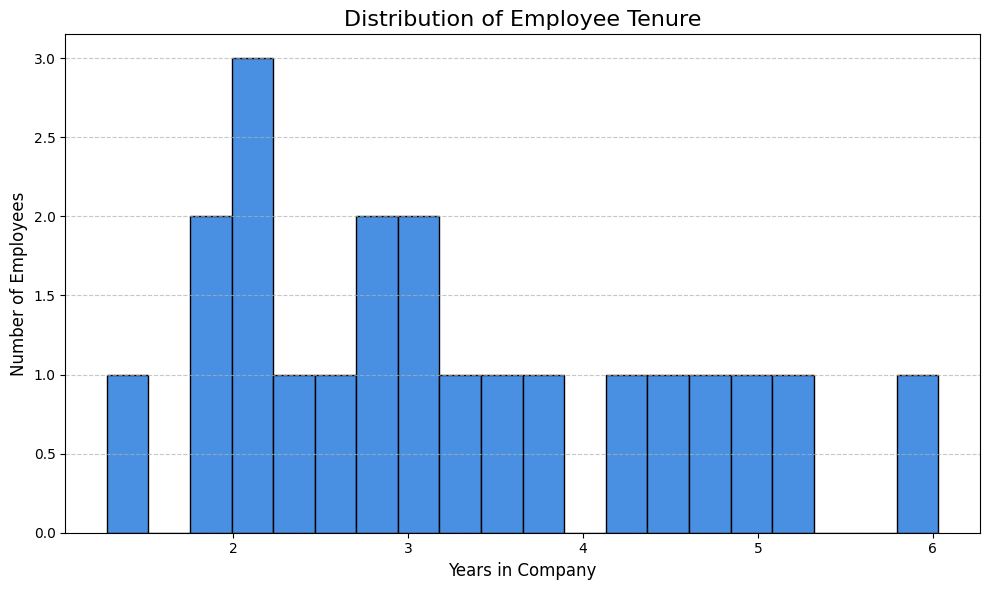

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_employees['AÑOS_EN_EMPRESA'], bins=20, edgecolor='black', color='#4A90E2')
plt.title("Distribution of Employee Tenure", fontsize=16)
plt.xlabel("Years in Company", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Hiring trend per year

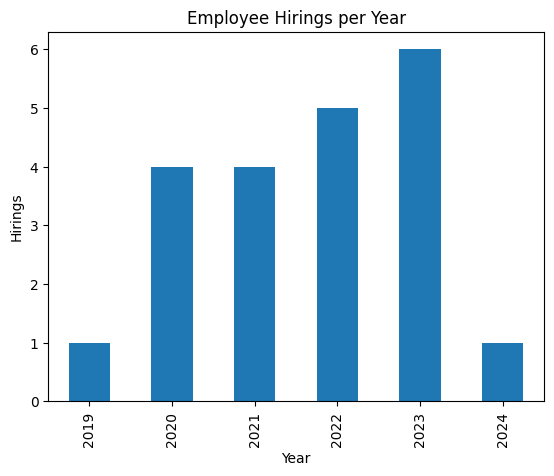

In [17]:
df_employees['AÑO_ALTA'] = df_employees['F_ALTA'].dt.year
altas_por_año = df_employees['AÑO_ALTA'].value_counts().sort_index()

plt.figure()
altas_por_año.plot(kind='bar')
plt.title("Employee Hirings per Year")
plt.xlabel("Year")
plt.ylabel("Hirings")
plt.show()


Termination trend per year

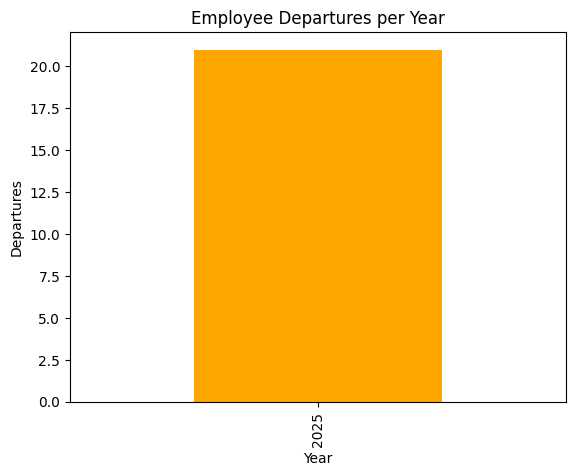

In [18]:
df_employees['AÑO_BAJA'] = df_employees['F_BAJA'].dt.year
bajas_por_año = df_employees[df_employees['F_BAJA'] != today]['AÑO_BAJA'].value_counts().sort_index()

plt.figure()
bajas_por_año.plot(kind='bar', color='orange')
plt.title("Employee Departures per Year")
plt.xlabel("Year")
plt.ylabel("Departures")
plt.show()


Two years of greatest growth/decrease

Years with Highest Employee Growth:
2023    6.0
2022    5.0
Name: count, dtype: float64
Years with Highest Employee Decline:
2025   -21.0
2019     1.0
Name: count, dtype: float64


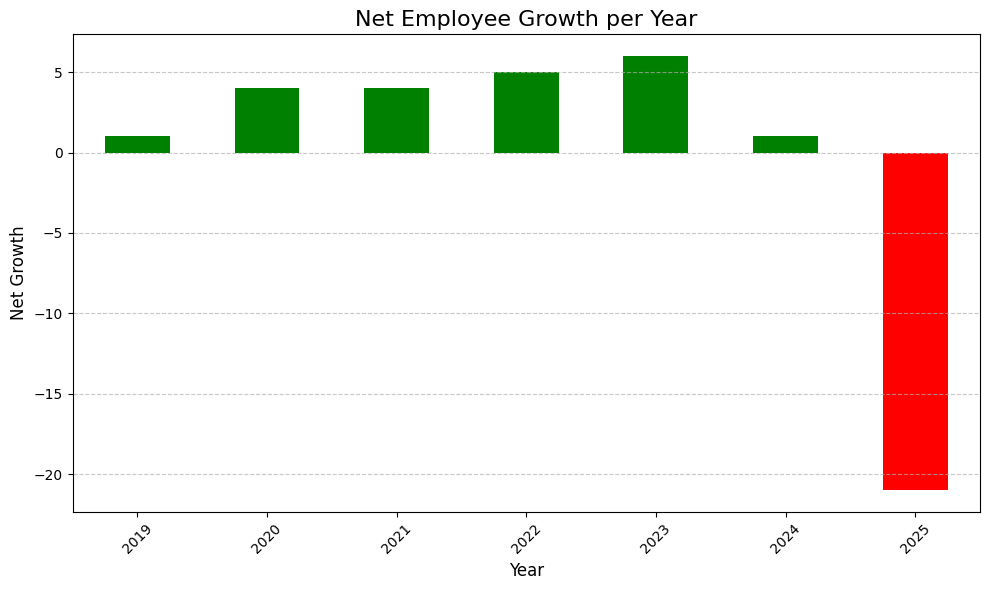

In [22]:
net_growth = altas_por_año.subtract(bajas_por_año, fill_value=0)
top_growth = net_growth.sort_values(ascending=False).head(2)
top_decline = net_growth.sort_values().head(2)


print("Years with Highest Employee Growth:")
print(top_growth)

print("Years with Highest Employee Decline:")
print(top_decline)

plt.figure(figsize=(10, 6))
net_growth.plot(kind='bar', color=['green' if x >= 0 else 'red' for x in net_growth])
plt.title("Net Employee Growth per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Net Growth", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Civil status distribution (Solteros vs Casados)

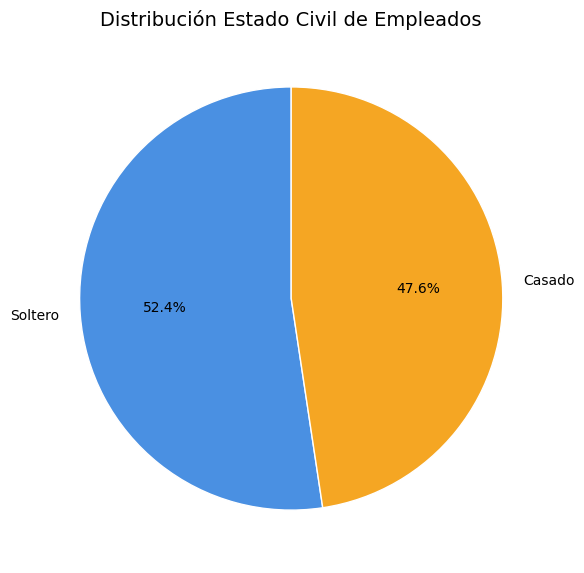

In [30]:
plt.figure(figsize=(6, 6))
df_employees['CX_EDOCIVIL'].map({'S': 'Soltero', 'C': 'Casado'}) \
    .value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                         colors=['#4A90E2', '#F5A623'], wedgeprops={'edgecolor': 'white'})

plt.title("Distribución Estado Civil de Empleados", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()


Age distribution + mean and std

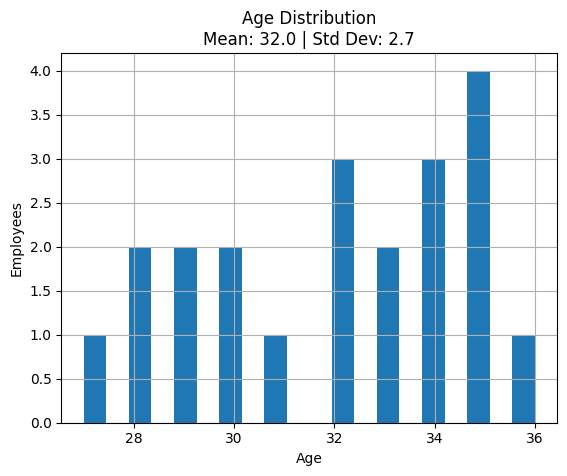

In [31]:
df_employees['F_NACIMIENTO'] = pd.to_datetime(df_employees['F_NACIMIENTO'])
df_employees['EDAD'] = ((today - df_employees['F_NACIMIENTO']).dt.days / 365).astype(int)

edad_media = df_employees['EDAD'].mean()
edad_std = df_employees['EDAD'].std()

plt.figure()
df_employees['EDAD'].hist(bins=20)
plt.title(f"Age Distribution\nMean: {edad_media:.1f} | Std Dev: {edad_std:.1f}")
plt.xlabel("Age")
plt.ylabel("Employees")
plt.show()
